In [5]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.decomposition import PCA



In [6]:
cleanedDf = pd.read_csv("cleaned_SpanishData.csv", delimiter=",")
expressionData = pd.read_csv("cleaned_SpanishExpressionData.csv", delimiter=",")

cleanedDftest = pd.read_csv("cleaned_SwedishData.csv", delimiter=",")
expressionDatatest = pd.read_csv("cleaned_ExpressionData.csv", delimiter=",")

In [7]:
cleanedDf

,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4210053,0,48.390000,0,0,0,0
1,GSM4210054,0,50.430000,0,0,0,0
2,GSM4210055,1,53.880904,0,0,0,0
3,GSM4210056,0,52.665298,1,1,0,0
4,GSM4210057,1,53.650924,0,0,0,0
...,...,...,...,...,...,...,...
196,GSM4210249,1,55.162218,1,0,1,0
197,GSM4210250,0,47.460000,0,0,0,0
198,GSM4210251,0,47.610000,1,1,1,0
199,GSM4210252,1,48.030000,0,0,0,0


In [8]:
expressionData.head()

,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.306521,3.872354,2.316856,5.257580,10.443235,12.400564,12.726936,8.267809,1.364667,2.774485,...,2.472133,5.958601,5.052269,5.708536,5.656193,5.698558,5.689048,6.115806,6.715135,6.115806
1,6.447310,4.230636,2.351660,4.136642,9.698942,12.010571,12.260004,7.199457,1.596095,3.157192,...,2.870586,6.009917,4.741401,5.771277,5.700213,5.641142,5.666386,4.556088,6.392481,4.556088
2,5.174195,4.093883,2.023151,4.514760,9.829755,12.060998,12.398072,7.549971,1.731998,2.496039,...,2.375494,6.088588,4.757923,5.629518,5.499724,5.615692,5.642813,6.957816,6.727878,6.957816
3,6.471684,4.100412,2.234162,5.362035,10.213408,12.201899,12.481544,7.548271,1.434883,2.553943,...,2.596263,6.022447,5.058751,5.847535,5.838800,6.004944,6.079604,4.610122,6.656566,4.610122
4,5.607725,4.163153,2.006832,5.256249,10.372409,12.249870,12.609717,7.864405,1.705209,3.103833,...,2.688786,6.212327,5.410218,5.977947,5.835658,5.946795,5.934129,5.393630,6.797457,5.393630


In [9]:
y = cleanedDf["Allergy"].values
x = expressionData.values

y2 = cleanedDftest["Allergy"].values
x2 = expressionDatatest.values

gene_ids = list(expressionData)

In [10]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x

array([[0.72541757, 0.19579843, 0.40418466, ..., 0.76859373, 0.85795678,
        0.76859373],
       [0.46783723, 0.62104   , 0.42668746, ..., 0.40029549, 0.73077627,
        0.40029549],
       [0.08617399, 0.45872886, 0.21428629, ..., 0.96741845, 0.86297977,
        0.96741845],
       ...,
       [0.39381965, 0.36003164, 0.25180164, ..., 0.68584128, 0.77647149,
        0.68584128],
       [0.26573576, 0.48698985, 0.1832308 , ..., 0.76289446, 0.62033128,
        0.76289446],
       [0.31085538, 0.35158934, 0.48157804, ..., 0.59349821, 0.72588236,
        0.59349821]])

In [11]:
scaler = MinMaxScaler()
scaler.fit(x2)
x2 = scaler.transform(x2)

In [12]:
#KBest
selector = SelectKBest(f_classif, k=100)
x_new = selector.fit_transform(x, y)
index_list = selector.get_support(indices=True)
index_list
gene_ids = list(expressionData)
gene_names = [gene_ids[i] for i in index_list]

In [13]:
#KBest
selector = SelectKBest(f_classif, k=100)
x2_new = selector.fit_transform(x2, y2)
index_list2 = selector.get_support(indices=True)
index_list2
gene_ids2 = list(expressionDatatest)
gene_names2 = [gene_ids2[i] for i in index_list2]
gene_names

['TC01000501.hg.1',
 'TC01002297.hg.1',
 'TC01004432.hg.1',
 'TC01004544.hg.1',
 'TC01005105.hg.1',
 'TC01005117.hg.1',
 'TC02002280.hg.1',
 'TC02004272.hg.1',
 'TC03001780.hg.1',
 'TC03002917.hg.1',
 'TC04000712.hg.1',
 'TC04000880.hg.1',
 'TC05000027.hg.1',
 'TC05001611.hg.1',
 'TC05002298.hg.1',
 'TC05003133.hg.1',
 'TC05003356.hg.1',
 'TC06000234.hg.1',
 'TC06000476.hg.1',
 'TC06000622.hg.1',
 'TC06001863.hg.1',
 'TC06002618.hg.1',
 'TC06002630.hg.1',
 'TC06002663.hg.1',
 'TC06003488.hg.1',
 'TC07000165.hg.1',
 'TC07000861.hg.1',
 'TC07001136.hg.1',
 'TC07001970.hg.1',
 'TC07002209.hg.1',
 'TC07003000.hg.1',
 'TC07003293.hg.1',
 'TC08000076.hg.1',
 'TC08000274.hg.1',
 'TC08001048.hg.1',
 'TC08001438.hg.1',
 'TC08001689.hg.1',
 'TC09000635.hg.1',
 'TC09001322.hg.1',
 'TC09001437.hg.1',
 'TC09001698.hg.1',
 'TC09002465.hg.1',
 'TC09002491.hg.1',
 'TC0X000232.hg.1',
 'TC10000510.hg.1',
 'TC10000524.hg.1',
 'TC10001593.hg.1',
 'TC11000127.hg.1',
 'TC11001333.hg.1',
 'TC11001353.hg.1',


In [221]:
#chi squared
selector = SelectKBest(chi2, k=300)
x_new = selector.fit_transform(x, y)

x_new.shape

(201, 300)

In [8]:
#Variance
selector = VarianceThreshold(0.459)
x_new = selector.fit_transform(x)

x_new.shape

(201, 435)

In [12]:
pca = PCA(n_components=201)
x_new = pca.fit_transform(x)

In [210]:
#Std
stds = []
for f in range(67528):
    column = x[:,f]
    #print(column.std(), f)
    stds.append((column.std(),f))
stds.sort(reverse=True)
stds = [t[1] for t in stds]
x_new = x[:,stds]
x_new = x_new[:,:475]

x_new.shape



    

#x_new = x[threshold]

(201, 475)

In [13]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_new, y, test_size=0.3, random_state=0)

[[-9.35981893e+00  2.46683290e+01  1.23676741e+01 ...  1.76672363e-01
   3.85414661e-02  1.21484956e-14]
 [ 5.64741147e+00  4.18172272e+00 -8.73699306e+00 ... -9.81984346e-01
   2.00739232e-02  1.21484956e-14]
 [-3.53602240e+01 -2.58751388e+00 -6.84613649e+00 ...  6.12866652e-01
   2.80390448e-01  1.21484956e-14]
 ...
 [-1.11553306e+01 -8.14907108e-01 -4.70718343e-01 ...  4.22360004e-01
  -1.55993651e-01  1.21484956e-14]
 [ 1.79533700e+01 -1.38180647e+01 -6.26853772e+00 ... -2.21420024e+00
   8.41207751e-01  1.21484956e-14]
 [-1.13257216e+01  7.20518291e+00 -4.93894410e+00 ...  2.44786280e-01
  -5.01961594e-01  1.21484956e-14]]


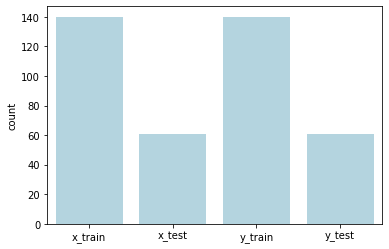

In [14]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
print(x_train)
plt.show()

In [15]:
lr = LogisticRegression(max_iter=1000)

In [16]:
lr.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

In [17]:
x_train.shape

(140, 201)

In [18]:
y_train.shape

(140,)

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

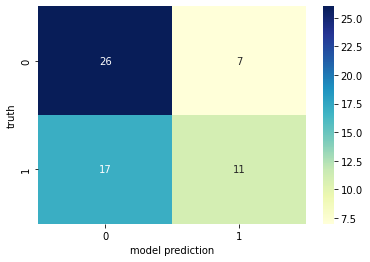

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [22]:
# test on spanish data
y_pred2 = lr.predict(x_test)
y_pred2


array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

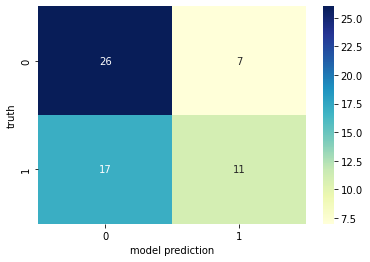

In [24]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68        43
           1       0.39      0.61      0.48        18

    accuracy                           0.61        61
   macro avg       0.59      0.61      0.58        61
weighted avg       0.67      0.61      0.62        61



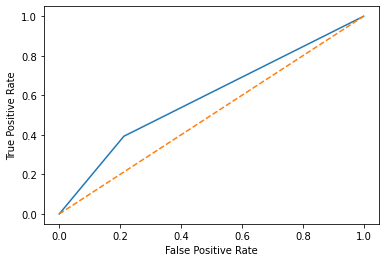

In [26]:
fpr, tpr, _ = roc_curve(y_test,  np.rint(y_pred))

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
roc_auc_score(y_test, np.rint(y_pred))

0.5903679653679653

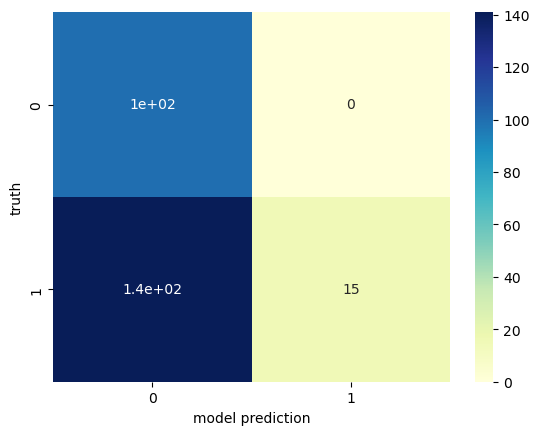

In [27]:
# test on spanish data
y_pred2 = lr.predict(x2_new)
y_pred2

cnf_matrix = metrics.confusion_matrix(y2, y_pred2) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 


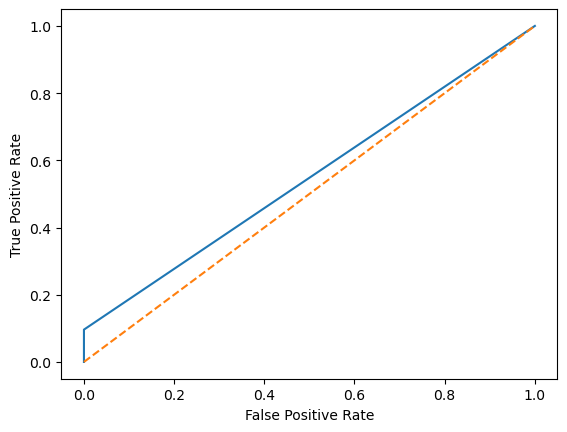

In [28]:
fpr, tpr, _ = roc_curve(y2,  np.rint(y_pred2))

plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle="dashed")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
roc_auc_score(y2, np.rint(y_pred2))

0.5480769230769231

In [20]:
# model weights
# exponent of each weight tells the importance 
lr.coef_

array([[ 0.71820257,  0.14053081,  0.63944941,  0.44087968, -0.65922089,
         0.22974114, -0.11449442,  0.07375531,  0.48069406,  0.11260304,
        -0.73360602,  0.39287472, -0.89927747, -0.74435186, -1.19084681,
         1.01878723,  0.90813166,  0.34629832, -0.41820883,  0.3399392 ,
         0.18056313,  0.30719972, -0.38297451, -0.82841775,  0.18611714,
         0.46322538, -0.44574644, -0.84888746,  0.44606407,  0.3301487 ,
        -0.29073489,  0.13771945,  0.81633958,  0.35408465,  0.77333197,
         0.59605979,  0.2648013 ,  0.75908111,  0.46734464,  0.37282345,
         0.7536229 ,  0.51052087,  0.50379175, -0.59884238, -0.82049248,
         0.28474557,  0.68566172,  0.26954547, -0.69399672,  0.3151915 ,
        -0.89026085,  0.14583129, -0.68335232,  0.04864573,  0.44502406,
        -0.40527076,  0.44683133, -0.08487497,  0.16985072, -0.12212849,
        -1.00010466,  0.30973703,  0.44647642, -0.01182829, -0.2569121 ,
        -1.03255077, -0.51565003, -1.15506803,  0.4

In [25]:
lst = list(np.exp(lr.coef_[0]))
lst = [(lst[i],i) for i in range(len(lst))]

In [26]:
lst.sort(reverse = True)
count = 0
for e in lst:
    if count< 10:
        print(str(e[0]) + "  " + str(index_list[e[1]]) +"  "+ str(gene_names[e[1]]))
        
    count+=1

2.7698335635277505  20732  TC05003133.hg.1
2.5005539759311697  54512  TC16001441.hg.1
2.4796853113194217  20955  TC05003356.hg.1
2.360684186950633  52136  TC15001840.hg.1
2.262204053144932  28560  TC08000076.hg.1
2.166974526760178  29514  TC08001048.hg.1
2.1363122885274426  31713  TC09000635.hg.1
2.1246836018455952  32752  TC09001698.hg.1
2.0507438353028564  492  TC01000501.hg.1
1.985084979652118  38253  TC10001593.hg.1
